# AI Lab Assignment 4

# 2. Building a classifier on a real dataset (3.5 points)

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
df = pd.read_csv("pima.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(768, 9)


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


**The goal is to predict whether or not a patient has diabetes from the values ​​of some variables. The target variable is "class".**

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Class:** Class variable ("yes" / "no")

In [3]:
feature_names = list(df.columns)
feature_names.remove('class')
print(feature_names)
X = df[feature_names].values
y = df['class'].values

['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


**Basic stats for each attribute:**

In [4]:
df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Smoothed histograms of each attribute in each class. Color indicates class ("yes"/"no"):**

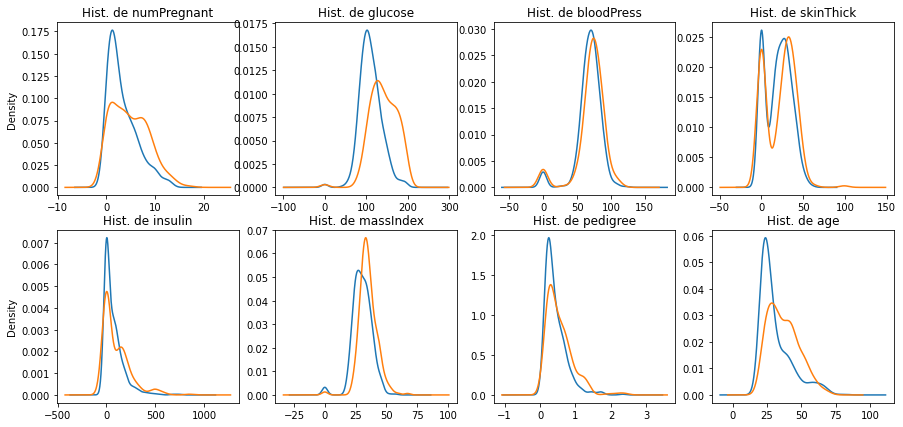

In [5]:
plt.figure(figsize=(15,7))
for i,n in enumerate(feature_names):
    plt.subplot(2,4,i+1)
    aux = 'Density' if i%4==0 else ''
    df.groupby("class")[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux)

## Training a model and testing its quality using 5-fold cross validation

The following cell trains a model and tests it on several different training-test partitions of the data. The result is a mean score with its standard deviation. The type of model (Naïve Bayes / decision tree / knn / logistic regression / neural network) and parameters used must be selected to obtain the best result.

In [6]:
from copy import copy

#Find best configuration using the data from previous cells
def graph_classifier_2(classifier, modify_clf, values, xlabel="", title="", X=X, y=y):
    '''plots a graph of the scores'''

    fig, axs = plt.subplots(2)
    fig.suptitle(title)
    clf = copy(classifier)
    max_val, argmax = -1, -1

    mean_scores, std_scores = [], []
    best_index = None

    # iterate over the options (depth, K, etc.)
    for i, param in enumerate(values):
        modify_clf(clf, param)
        aux_scores = cross_val_score(clf, X, y, cv=5)
        mean = aux_scores.mean()
        st = aux_scores.std()

        #update maximum and argmax. max() falla si se usa con la lista de np mean scores!
        if max_val <= mean:
            max_val = mean
            argmax = param
            best_index = i

        mean_scores.append(mean)
        std_scores.append(st)

    axs[0].set_ylabel("Mean")
    axs[1].set_ylabel("Standard deviation")
    axs[0].set_xlabel(xlabel)
    axs[1].set_xlabel(xlabel)
    axs[0].plot(values, mean_scores)
    axs[1].plot(values, std_scores)
    fig.tight_layout()

    return (max_val, argmax, std_scores[best_index])


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
# other classifiers (from notebook p4_01)

clf = KNeighborsClassifier(n_neighbors=1) # DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=5)
print("All scores: ", scores)
print("KNeighburs Global Model Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))


All scores:  [0.64285714 0.62987013 0.66883117 0.75816993 0.61437908]
KNeighburs Global Model Score: 0.66 +/- 0.05


## Answer the following questions here:

* What is the best score you get with a k-nn and with what k (value of n_neighbours)?
* What is the best score you get with a decision tree and at what maximum depth (value of max_depth)?
* What is the best score you get with a neural network and with what configuration (value of hidden_layer_sizes)?

Note: to answer these questions you just have to change the type of model and its parameters in the previous cell.

The following cells answer these questions.

## KNeigborsClassifier

The maximum mean is 0.7553 and it is reached with 14 neighbors. The std is 0.04.


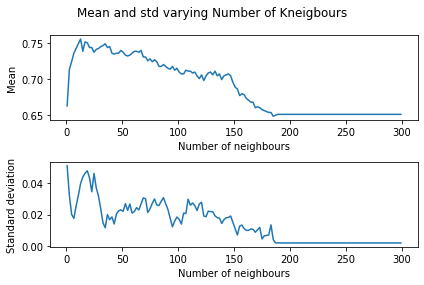

In [11]:

k_neighbors_classifier = KNeighborsClassifier(n_neighbors=1)

def change_k(clf, k):
    clf.n_neighbors = k 

max_mean,argmax,std = graph_classifier_2(
    classifier=k_neighbors_classifier,
    values=list(range(1, 300, 2)),
    modify_clf=change_k,
    title="Mean and std varying Number of Kneigbours",
    xlabel="Number of neighbours"
)

print("The maximum mean is {:.4f} and it is reached with {} neighbors. The std is {:.2f}.".format(max_mean, argmax, std))


## Decision Tree

The maximum mean is 0.74 and it is reached with a depth of 4. The std is 0.02.


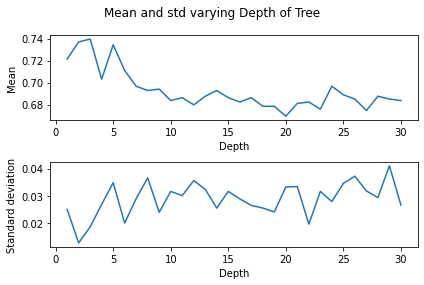

In [12]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=1)

def change_depth(clf, depth):
    clf.max_depth = depth 


max_mean,argmax,std=graph_classifier_2(
    classifier=dt_classifier,
    values=list(range(1,31)),
    modify_clf=change_depth,
    title="Mean and std varying Depth of Tree",
    xlabel="Depth"
)

print("The maximum mean is {:.2f} and it is reached with a depth of {}. The std is {:.2f}.".format(max_mean,argmax,std))

## Logistic regression
Logistic regression changing the max number of iterations, **without any penalty**.

The maximum mean is 0.77 and it is reached with a depth of 450. The std is 0.02.


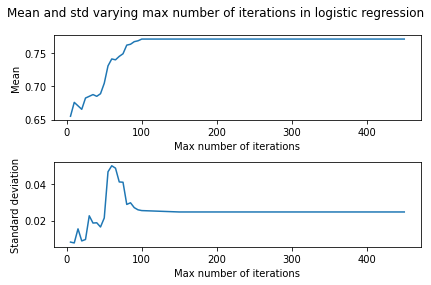

In [8]:
dt_classifier = LogisticRegression(penalty='none')

def change_max_iter(clf, max_iter):
    clf.max_iter = max_iter

with warnings.catch_warnings(record=True) as wlist:
    warnings.simplefilter("always",UserWarning)
    max_mean,argmax,std=graph_classifier_2(
        classifier=dt_classifier,
        values=list(range(5, 100, 5)) + list(range(100, 500, 50)),
        modify_clf=change_max_iter,
        title="Mean and std varying max number of iterations in logistic regression",
        xlabel="Max number of iterations",
    )

print("The maximum mean is {:.2f} and it is reached with a depth of {}. The std is {:.2f}.".format(max_mean,argmax,std))

In [9]:
# List of warnings to see when convergence is not being reached.
for w_message in set([str(w.message) for w in wlist]):
    print(w_message)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The code from the cell above shows that the LogisticRegression classifier has failed to reach convergence for some values of max_iterations. The warnings do not specify those values but the standard deviation plot hints that converngence may not be reached when max_iterations is smaller than 100 (aprox).

As we can see, it gets to a point where the mean and std stabilize around 0.77 and 0.02, respectively, for max_iter > 160. Although this results in a classifier that is very closely fitted to our own data, and may not perform well with other samples (overfitting).
Note that there are warnings of non-convergence, we have ignored the suggestions to preprocess the data, as it is to be done in the next section.

Now, we will fix the max_iter value in 400, and modify the penalty.

The maximum mean is 0.77 and it is reached with a depth of l2. The std is 0.02.


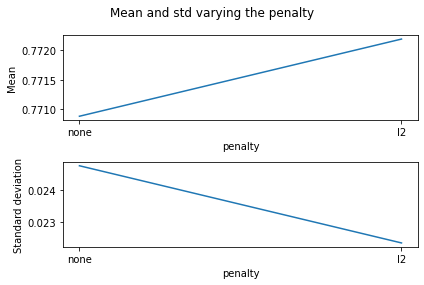

In [22]:
dt_classifier = LogisticRegression(max_iter=400)

def change_max_iter(clf, p):
    clf.penalty = p

# Solver lbfgs supports only 'l2' or 'none' penalties

max_mean,argmax,std=graph_classifier_2(
    classifier=dt_classifier,
    values=['none', 'l2'],
    modify_clf=change_max_iter,
    title="Mean and std varying the penalty",
    xlabel="penalty",
)

print("The maximum mean is {:.2f} and it is reached with a depth of {}. The std is {:.2f}.".format(max_mean,argmax,std))

The improvement done by the penalty is very small - basically insignifficant. The mean goes from 77,1% in the case of no penalty to 77,2% in the case of L2 penalty. However, the penalty is suposed to improve the performance on unknown datasets; so it is not unexpected that we do not see significant results when doing cross-validation.

## MLPClassifier

In [27]:
from sklearn.neural_network import MLPClassifier
import pylab

N=100
clf=MLPClassifier(hidden_layer_sizes=(2,2),
                              max_iter=1000,
                              alpha=0)

score=pylab.zeros([N,N])
# iterate over all combinations of hidden_layer_sizes = (i,j),
# for i,j in {1, 2, 3, ... , 100}
for i in range(N):
    for j in range(N):

        clf.hidden_layer_sizes=(i+1,j+1)
        score[i,j]=cross_val_score(clf, X, y, cv=5).mean()



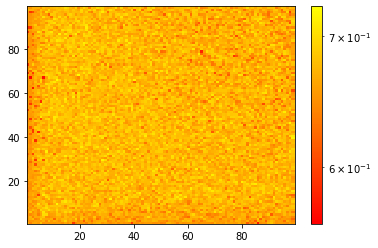

In [29]:
import numpy as np
from matplotlib.colors import LogNorm
  
xx = pylab.linspace(1, 99, 100)
yy = pylab.linspace(1, 99, 100)
pylab.pcolor(xx, yy, score,norm=LogNorm(vmin=score.min(), vmax=score.max()), cmap=plt.cm.autumn)
pylab.colorbar()
pylab.show()

The colormap above shows the cross validation score for different configurations of a neuron network with two layers. The axes represent the number of neurons in each of the two hidden layers (varying from 1-100). 

Rather than trying to obtain the best configuration for two single layers, this plot indicates that there are not a list of patterns that perform significantly better than the rest. 

In general, all the scores fluctuate around the 60% and 70%. Moreover, configurations where one of the two layers have a reduce number of neurons (~5) give worse results; this is seen in the two axes of the plot where the color is close to darker tones of red than in the rest of the square.

## Naive Bayes

This time, we will try the different models of naive Bayes. As seen in the documentation (https://scikit-learn.org/stable/modules/naive_bayes.html) The difference between these classifiers is the assumption they make to calculate P(x_i|y) where y is the class.

In [80]:
from sklearn.naive_bayes import *
classifiers=[["Gaussian",GaussianNB()],["Multinomial",MultinomialNB()],["Complement", ComplementNB()],["Bernoulli", BernoulliNB()]]

max_val = -1
for name,clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=5)
    mean = scores.mean()
    deviation = scores.std()

    if max_val<= mean:
        max_val = mean
        argmax = name
        std = deviation

print("The maximum mean is {:.4f} and it is reached with the {} classifier. The std is {:.2f}.".format(max_mean, name, std))



The maximum mean is 0.7670 and it is reached with the Bernoulli classifier. The std is 0.02.


# Improve the model: feature processing and parameter search

Sometimes, instead of using more complex models, it is more useful to spend more time processing the data to get better results.

In this section you will investigate a few approaches for preparing the data which are likely to improve the results: feature construction and selection, feature preprocessing (detection of outliers, missing values, centering and scaling).

Give reasons why you decide to try or ignore any of these methods, and how the results change when you apply them (you can create as many cells as you want).

In [5]:
from copy import copy
df2 = copy(df)
# substitute strings by numbers: yes==>1, no==>0
df2['class'] = df2['class'].replace('yes', value=1)
df2['class'] = df2['class'].replace('no', value=0)
df2.head()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We will now separate the data in two sets: training set and test set.
The idea is to use the test set as a way to validate how good the processing 
of our training data has been.

In [10]:
import numpy as np

# a fifth of the data used to test
num_test_data = len(df2) // 5 

# select a random permutation 
indices = np.random.permutation(len(df2))
X2 = df2[feature_names].values
y2 = df2['class'].values
# training samples:
X_train = X2[indices[:-num_test_data]]
y_train = y2[indices[:-num_test_data]]
# test samples:
X_test = X2[indices[-num_test_data:]]
y_test = y2[indices[-num_test_data:]]

## Standardization

By standarizing the values we expect that Knn will give better results this time as the distances are of the same magnitude for every attribute.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# the standardized data:
df_scaled = pd.DataFrame(data=scaler.fit_transform(df2), columns=df2.columns)
df_scaled['class'] = df2['class'] # the class does not have to be standardized

X_train_scaled = scaler.fit_transform(X_train)

# we also have to standardize the test values, 
# so that the prediction can be made according to the training data
X_test_scaled = scaler.fit_transform(X_test)

df_scaled

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [48]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier.fit(X=X_train_scaled, y=y_train)
prediction = k_neighbors_classifier.predict(X=X_test_scaled)
success_rate = np.sum(prediction==y_test) / len(y_test)

print(f"Success rate after standardization: {success_rate}")

Success rate after standardization: 0.7647058823529411


The results are basically the same as the previously observed ones, which were done without using standardization. We think that internally, the method fit (for a Knn classfier) may be apllying some kind of standardization.

## Outliers

In this part we will deal with atypical data observations. It is worth noticing that there is no difference on using the original data (`df`) or the rescaled one (`df_scaled`) as both will present the same outliers. The next two boxplots (usefull for detecting outliers) show that both data sets present the same shape although the values are not equal (the second data set has been rescaled).

Removing outliers will not affect all classifiers in the same way. For instace, an outlier will not be significant when considering more than a neighbour in Knn. 



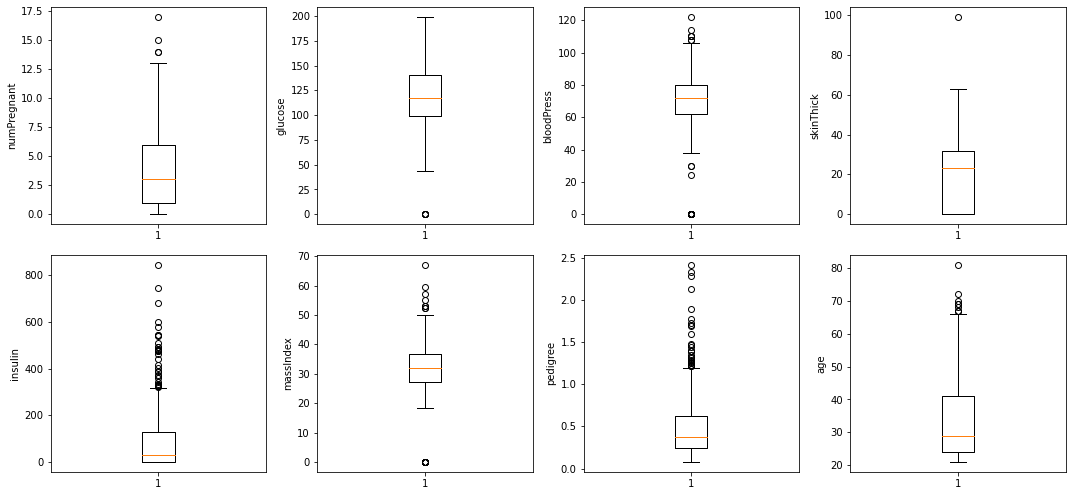

In [49]:
# Boxplots of the data without standardization 
plt.figure(figsize=(15,7))
for i,attr in enumerate(feature_names):
    plt.subplot(2,4,i+1)
    plt.boxplot(data=df,x=df[attr])
    plt.ylabel(attr)

plt.tight_layout()

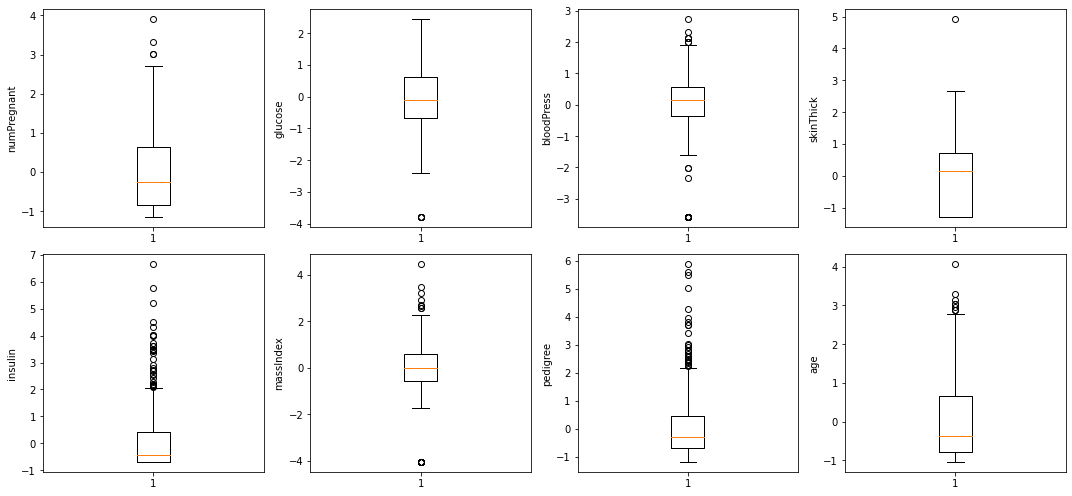

In [50]:
# Boxplots of the data after standardization 
plt.figure(figsize=(15,7))
for i,attr in enumerate(feature_names):
    plt.subplot(2,4,i+1)
    plt.boxplot(data=df_scaled,x=df_scaled[attr])
    plt.ylabel(attr)

plt.tight_layout()

In [51]:
# we will now remove the outliers (those further from the mean than 3 times the standard deviation), 
# to leave out around 5% of the most extreme samples of each column. The removal will ony be made for 
# the training data.

#select training data and test data
df_train=df2.sample(frac=0.8) #random state is a seed value
df_test=df2.drop(df_train.index)
print("Length of training set before preprocessing:",len(df_train))

for col_name in feature_names: 
    mean = df2[col_name].mean()
    std = df2[col_name].std()
    cut_off = std * 3
    lower, upper = mean-cut_off, mean+cut_off
    df_train = df_train[(df_train[col_name] < upper) & (df_train[col_name] > lower)]
df_train

Length of training set before preprocessing: 614


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
34,10,122,78,31,0,27.6,0.512,45,0
89,1,107,68,19,0,26.5,0.165,24,0
680,2,56,56,28,45,24.2,0.332,22,0
633,1,128,82,17,183,27.5,0.115,22,0
39,4,111,72,47,207,37.1,1.390,56,1
...,...,...,...,...,...,...,...,...,...
482,4,85,58,22,49,27.8,0.306,28,0
668,6,98,58,33,190,34.0,0.430,43,0
31,3,158,76,36,245,31.6,0.851,28,1
171,6,134,70,23,130,35.4,0.542,29,1


There are now 555 samples


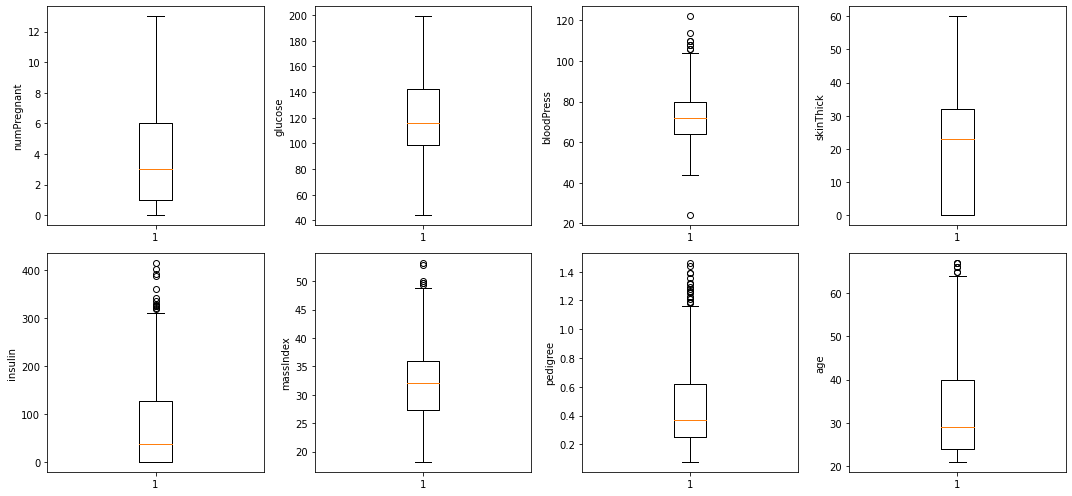

In [52]:
plt.figure(figsize=(15,7))
for i,attr in enumerate(feature_names):
    plt.subplot(2,4,i+1)
    plt.boxplot(data=df_train,x=df_train[attr])
    plt.ylabel(attr)

print("There are now {} samples".format(len(df_train)))
plt.tight_layout()

In [76]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier.fit(X=df_train[feature_names].values, y=df_train['class'].values)

print(f"Success rate after removing outliers: \
    {k_neighbors_classifier.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.7337662337662337


In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X=df_train[feature_names].values, y=df_train['class'].values)

print(f"Success rate after removing outliers: \
    {dt_clf.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.7272727272727273


In [88]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(max_iter=500)
mlp_clf.fit(X=df_train[feature_names].values, y=df_train['class'].values)

print(f"Success rate after removing outliers: \
    {mlp_clf.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.6753246753246753


Again, the results are not much better tan those that we got without preprocessing outliers. So this approach at removing outliers does not seem very effective.

## Data processing
Here we will try to remove missing values and possibly columns, so that the data makes a little sense. But for this, we have to take into account what each column actually means. 

In the cell which is labled: **Smoothed histograms of each attribute in each class. Color indicates class ("yes"/"no"):**; it appears that some values have some stange bumps around 0, which could point to missing data in those rows, at least for some of the attributes.

In [6]:
#select training data and test data
df_train=df2.sample(frac=0.8)    # 80% of the data for training
df_test=df2.drop(df_train.index) # 20% for testing

In [7]:
print(f"There are no NaN values: {len(df2) == len(df2.dropna())}")
# zero values by columns:
num_missing = (df_train[feature_names] == 0).sum()
# report the results
print(num_missing, '\nTraining set length:', len(df_train))

There are no NaN values: True
numPregnant     93
glucose          2
bloodPress      29
skinThick      186
insulin        294
massIndex       11
pedigree         0
age              0
dtype: int64 
Training set length: 614


For attribute 'numPregnant', 0 is an expected value.
However, for columns 'glucose', 'bloodPress', 'skinThick', 'insulin' and 'massIndex'; it is not a real value. Therefore, we can consider these values missing data.

Columns 'glucose', 'bloodPress' and 'massIndex' have small enough number of missing rows, that we can remove those rows from our training data.

In [8]:
df_train_trimmed = df_train[
      (df_train['glucose'] != 0) 
    & (df_train['bloodPress'] != 0)
    & (df_train['massIndex'] != 0)
]

num_missing = (df_train_trimmed[feature_names] == 0).sum()
# report the results
print(num_missing, '\nTraining set length:', len(df_train_trimmed))

numPregnant     83
glucose          0
bloodPress       0
skinThick      156
insulin        260
massIndex        0
pedigree         0
age              0
dtype: int64 
Training set length: 579


Now, let's train and validate the results.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier.fit(X=df_train_trimmed[feature_names].values, y=df_train_trimmed['class'].values)

print(f"Success rate after removing outliers: \
    {k_neighbors_classifier.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.7207792207792207


In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X=df_train_trimmed[feature_names].values, y=df_train_trimmed['class'].values)

print(f"Success rate after removing outliers: \
    {dt_clf.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.6948051948051948


In [11]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(max_iter=500)
mlp_clf.fit(X=df_train_trimmed[feature_names].values, y=df_train_trimmed['class'].values)

print(f"Success rate after removing outliers: \
    {mlp_clf.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.7207792207792207


The results are still very similar to the results before preprocessing. Now let's change the insulin and skin thickness missing values to the mean of their respective columns. The missing values are so numerous that removing rows would leave us with too few samples.

In [12]:
insulin_mean = df_train_trimmed['insulin'].mean()
skin_thick_mean = df_train_trimmed['skinThick'].mean()
print("means:",insulin_mean, skin_thick_mean)

df_train_trimmed['skinThick'] = df_train_trimmed['skinThick'].replace(0, skin_thick_mean)
df_train_trimmed['insulin'] = df_train_trimmed['insulin'].replace(0, insulin_mean)


num_missing = (df_train_trimmed[feature_names] == 0).sum()
# report the results
print(num_missing, '\nTraining set length:', len(df_train_trimmed))

means: 83.66666666666667 21.236614853195164
numPregnant    83
glucose         0
bloodPress      0
skinThick       0
insulin         0
massIndex       0
pedigree        0
age             0
dtype: int64 
Training set length: 579


/tmp/ipykernel_7058/2476621320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_trimmed['skinThick'] = df_train_trimmed['skinThick'].replace(0, skin_thick_mean)
/tmp/ipykernel_7058/2476621320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_trimmed['insulin'] = df_train_trimmed['insulin'].replace(0, insulin_mean)


And now, we check the results.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier.fit(X=df_train_trimmed[feature_names].values, y=df_train_trimmed['class'].values)

print(f"Success rate after removing outliers: \
    {k_neighbors_classifier.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.6558441558441559


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X=df_train_trimmed[feature_names].values, y=df_train_trimmed['class'].values)

print(f"Success rate after removing outliers: \
    {dt_clf.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.6428571428571429


In [15]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(max_iter=500)
mlp_clf.fit(X=df_train_trimmed[feature_names].values, y=df_train_trimmed['class'].values)

print(f"Success rate after removing outliers: \
    {mlp_clf.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.5974025974025974


The success rate falls. But now let's try changing the values of the test set so that the missing values no longer occur by replacing them with the mean of the column.

In [16]:
not_zero_features = copy(feature_names)
not_zero_features.remove('numPregnant')
for col in not_zero_features:
    df_test[col] = df_test[col].replace(0, df2[col].mean())


num_missing = (df_test[feature_names] == 0).sum()
# report the results
print(num_missing)

numPregnant    18
glucose         0
bloodPress      0
skinThick       0
insulin         0
massIndex       0
pedigree        0
age             0
dtype: int64


In [17]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier.fit(X=df_train_trimmed[feature_names].values, y=df_train_trimmed['class'].values)

print(f"Success rate after removing outliers: \
    {k_neighbors_classifier.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.7142857142857143


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X=df_train_trimmed[feature_names].values, y=df_train_trimmed['class'].values)

print(f"Success rate after removing outliers: \
    {dt_clf.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.7142857142857143


In [19]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(max_iter=500)
mlp_clf.fit(X=df_train_trimmed[feature_names].values, y=df_train_trimmed['class'].values)

print(f"Success rate after removing outliers: \
    {mlp_clf.score(df_test[feature_names].values, df_test['class'].values)}")


Success rate after removing outliers:     0.6883116883116883


The results are very low still. Although replacing missing values in the test set increases the score, it is not an improvement with respect to the results that we had before preprocessing the data.

# Nested Cross Validation
 
*Do you think that another configuration of the classifier hyperparameters can solve the problem more efficiently?*

We have been trying different hyperparameters, but until now we have been choosing kind of blindly, as we are not familiar with which parameters are worth changing in each classifier. So it is very likely that other values would yield much better results. It is worth mentioning that the best hyperparameters for this particular problem may not be the best (even not good at all) for other datasets.  

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

'''
Code adapted from: https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/
The function best_params_NCV (nested-cross validation) returns the best params from a given grid and the 
score difference between nested .
Arguments:
    -model: model to be tested
    -p_grid: grid of params to be changed (all the combinations are performed)
    -df: data to be used
    -n_rep: number of times that the NCV is performed
Returns:
    -best_params: the list of best parameters of all searches
    -outer_results: the list of accuracies of each best model when used to predict the test samples
'''


def best_params_NCV(model, p_grid:dict, df = pd.read_csv("pima.csv"), n_rep=20):
  
    # Load the dataset
    feature_names = list(df.columns)
    feature_names.remove('class')
    X = df[feature_names].values
    y = df['class'].values

    # Arrays to store scores
    outer_results = list()
    best_params = list()
    for i in range(n_rep):
        # configure the cross-validation procedure
        cv_outer = KFold(n_splits=10, shuffle=True, random_state=i)
        # Loop for each trial
        for train_ix, test_ix in cv_outer.split(X):
            # split data
            X_train, X_test = X[train_ix, :], X[test_ix, :]
            y_train, y_test = y[train_ix], y[test_ix]
            # configure the cross-validation procedure
            cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
            # define search
            search = GridSearchCV(estimator=model, param_grid=p_grid, scoring='accuracy', cv=cv_inner, refit=True)
            
            # execute search
            result = search.fit(X_train, y_train)
            # get the best performing model fit on the whole training set
            best_model = result.best_estimator_
            # evaluate model on the hold out dataset
            yhat = best_model.predict(X_test)
            # evaluate the model
            acc = accuracy_score(y_test, yhat)
            
            # store the result and the best parameters
            outer_results.append(acc)
            best_params.append(result.best_params_)
            # report progress
            #print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))

    # summarize the estimated performance of the model
    print('Accuracy mean +/- std: %.3f +/- (%.3f)' % (np.mean(outer_results), np.std(outer_results)))
    
    return best_params, outer_results 

Now we will se which configuration of the hyperparameters best predicts the data that we have. Of course, if the data changes, the optimal hyperparameters will also change.

In [11]:
# decision tree:
p_grid = {"criterion":["gini","entropy"],"max_depth":[2,3,4,5,6,7]}
dt_best_params, dt_accuracy = best_params_NCV(DecisionTreeClassifier(), p_grid)

Accuracy mean +/- std: 0.736 +/- (0.048)


In [12]:
from statistics import mode
print(f"The best configuration from {p_grid} for the decision tree classifier is {mode([tuple(i.values()) for i in dt_best_params])}.")
print(f"The best configuration for the criterion of the decision tree classifier is {mode([tuple(i.values())[0] for i in dt_best_params])}.")
print(f"The best configuration for the max_depth of the decision tree classifier is {mode([tuple(i.values())[1] for i in dt_best_params])}.")
print(f"The highest accuracy achieved is: {np.max(dt_accuracy)}")


The best configuration from {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7]} for the decision tree classifier is ('gini', 2).
The best configuration for the criterion of the decision tree classifier is gini.
The best configuration for the max_depth of the decision tree classifier is 2.
The highest accuracy achieved is: 0.8311688311688312


For the decision tree, we have decided to see the difference in performance of the depth of the tree, and of the criterion used to select the atribute for the root of each subtree. The results regarding the criterion probably depend a lot on the problem. But as we have seen in class, usually lower maximum depths perform better when tested with data unknown at training, mainly because lower maximum depths avoid overfitting the model to the training data.

Now, we can observe that the score that we get with the best model in the iterations has a value of more than 83%. This is a much better result than we got in the previous sections.

In [13]:
# Knn
p_grid = {"n_neighbors":list(range(3,26,2)),"weights":["uniform", "distance"], "p":[1,2]}
knn_best_params, knn_accuracy = best_params_NCV(KNeighborsClassifier(), p_grid)

Accuracy mean +/- std: 0.747 +/- (0.047)


In [14]:
from statistics import mode
print(f"The best configuration from {p_grid} for the Knn classifier is {mode([tuple(i.values()) for i in knn_best_params])}.")
print(f"The best configuration for K in the Knn classifier is {mode([tuple(i.values())[0] for i in knn_best_params])}.")
print(f"The best configuration for weights of the Knn classifier is {mode([tuple(i.values())[1] for i in knn_best_params])}.")
print(f"The highest accuracy achieved is: {np.max(knn_accuracy)}")


The best configuration from {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance'], 'p': [1, 2]} for the Knn classifier is (19, 1, 'distance').
The best configuration for K in the Knn classifier is 11.
The best configuration for weights of the Knn classifier is 1.
The highest accuracy achieved is: 0.8701298701298701


In the Knn, we of course use the n_neighbors hyperparameter for the grid. Another hyperparameters that we have selected is the p of the Minkowski distances and the weight function used in prediction. The optimal K in the Knn classifier will be quite low, as the number of samples is quite high (>500); that is why we only test $K\in\{3, 5, ... ,25 \}$. 

The best result achieved with the optimal hyperparameters during the NCV with the test values is the highest that we have gotten until now. The best model that we get here has: `weights = 'distance'`, `p=1` and `K = 19`. Although if we search for the best K over all the best models, `K = 11` is the most common one among them.

In [12]:
# MLP

p_grid = {"alpha":[0, 0.001, 0.01],"hidden_layer_sizes":[(100,), (50,), (20,), (16,16), (25,16), (25,25)]}
with warnings.catch_warnings(record=True) as wlist:
    warnings.simplefilter("always",UserWarning)
    mlp_best_params, mpl_accuracy = best_params_NCV(MLPClassifier(max_iter=500), p_grid, n_rep=5)

Accuracy mean +/- std: 0.703 +/- (0.057)


In [15]:
for w_message in set([str(w.message) for w in wlist]):
    print(w_message)

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


As it has happened before in this notebook, the MLP may fail to converge in some ocassions. This time, it just happened once. (We have tried 18 different hyperparameters configurations, which with the NCV procedure that we have coded that results in $10*3*18$ different training configurations -- parameters and training values --  for each of the n_reps of the `best_params_NCV` function).

In [13]:
from statistics import mode
print(f"The best configuration from {p_grid} for the MLP classifier is {mode([tuple(i.values()) for i in mlp_best_params])}.")
print(f"The best configuration for alpha in the MLP classifier is {mode([tuple(i.values())[0] for i in mlp_best_params])}.")
print(f"The best configuration for hidde_layer_sizes in the MLP classifier is {mode([tuple(i.values())[1] for i in mlp_best_params])}.")
print(f"The highest accuracy achieved is: {np.max(mpl_accuracy)}")


The best configuration from {'alpha': [0, 0.001, 0.01], 'hidden_layer_sizes': [(100,), (50,), (20,), (16, 16), (25, 16), (25, 25)]} for the MLP classifier is (0.01, (100,)).
The best configuration for alpha in the MLP classifier is 0.001.
The best configuration for hidde_layer_sizes in the MLP classifier is (100,).
The highest accuracy achieved is: 0.8311688311688312


Finally, for the MLP classifier, we are changing the 'alhpa' value, which denotes the weight given to the L2 penalty (regularization) used for the error. Of course, we are also changing the configuration of the hidden layers. 

We have tried some configurations of one and two layers, with different sizes for each layer, but it is very tedious to execute with this classifier, as it takes a very long time, so we have not been able to test as many layer configurations as we would have wanted. There are quite a lot of values, and it appears that the best parameters out of the ones that we have tested contain the layer configuration with the highest number of neurons. Having observed this, we should try to increase the number of neurons to see if higher values could increase the accuracy; but as we have said, the tests take too much time.

For the third time, the best performance of one of the best models improves quite a lot compared to the accuracies achieved in the previous sections.